In [1]:
import pandas as pd
import sys;sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
from surprise import SVD, Reader, Dataset
from collections import defaultdict
import numpy as np
import joblib

df = joblib.load('../data/explicit.pkl')
df = df[["user_id", "book_id", "book_rating"]]
df.head()

,user_id,book_id,book_rating
0,2954,0060973129,8.0
1,35704,0374157065,6.0
2,110912,0374157065,10.0
3,157969,0374157065,8.0
4,192665,0374157065,8.0


In [2]:
from util.train_test_split import split

train_df, test_df, user_df, book_df, rating_df = split(df=df)

splitは46.47秒かかりました


In [3]:
del df

In [4]:
print(f"trainデータサイズ：　{len(train_df)}")
print(f"testデータサイズ：　{len(test_df)}")

trainデータサイズ：　20194
testデータサイズ：　2286


In [5]:
# train, testデータで観測構造が違う状況を作る。
#dummy_rating = np.random.randint(1, 11, len(test_df))
#test_df["Book-Rating"] = dummy_rating


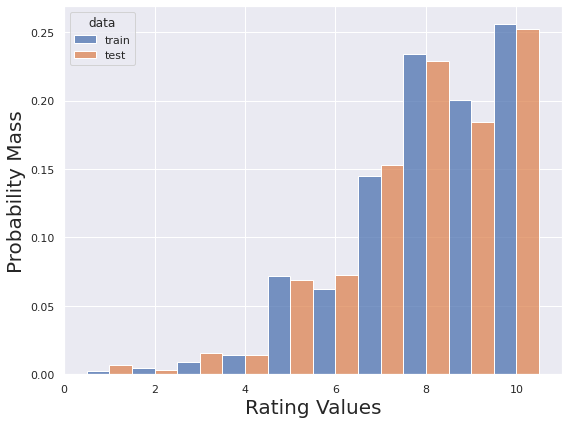

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

train_df["data"] = "train"
test_df["data"] = "test"
data_df = pd.concat([train_df, test_df])

plt.subplots(1, figsize=(8,6))
sns.histplot(
    data_df, 
    x="book_rating",  
    stat="probability", 
    discrete=True,
    hue="data",
    multiple="dodge",
    common_norm=False,
)

plt.xlabel('Rating Values', fontdict=dict(size=20))
plt.ylabel('Probability Mass', fontdict=dict(size=20))
plt.tight_layout()
plt.show()

In [7]:
# 少量の完全ランダムな嗜好度合いデータを用いて傾向スコアを推定する [Schnbel16]
numerator = np.unique(train_df["book_rating"].values, return_counts=True)[1]
numerator = numerator / numerator.sum() #P(R=r|O=1)の推定
denominator = np.unique(test_df["book_rating"].values, return_counts=True)[1]
denominator = denominator / denominator.sum() #(擬似的に作った真の) P(R=r)
numerator / denominator

array([0.3773398 , 1.52014035, 0.56600971, 0.98794421, 1.05126389,
       0.85651589, 0.94507449, 1.02163129, 1.08775799, 1.01450128])

In [8]:
train_df.drop(columns='data', inplace=True)
test_df.drop(columns='data', inplace=True)

In [9]:
from src.MF import MF

In [10]:
model = MF(train_df, test_df)

In [11]:
#model.set_params(n_epochs=100, n_factors=300, reg_all=2.0)
#model.cross_validation(k=2)

In [12]:
#model.kfold_score

In [34]:
model.set_params(lr_all=0.00001, reg_all=0.00001, n_factors=250, n_epochs=100)
model.test()

testは146.05秒かかりました


In [35]:
model.test_score

,precision,recall,RMSE
1,0.55,0.55,1.82


In [36]:
model.recommend()

for文のタイム: 12.20秒
recommendは136.36秒かかりました


In [37]:
user_df = model.reclist_to_csv(user_df)

各ユーザにレコメンドされた本のユニーク数: 1117


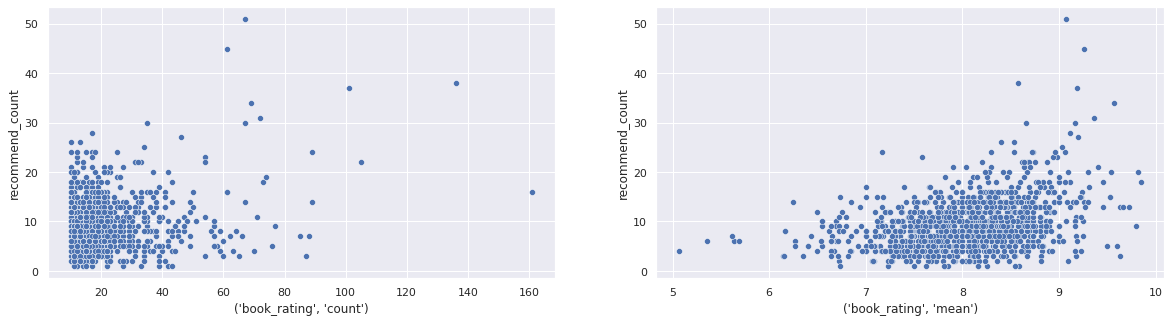

In [38]:
model.check_over_fit_model(user_df, rating_df)

In [39]:
#joblib.dump([user_df, book_df, rating_df], "../data/mf-api.pkl")

['../data/mf-api.pkl']

In [40]:
user_df

,user_id,age,city,state,country,mf_recommend_item
0,254,24.00,minneapolis,minnesota,usa,"[0425141233, 067164257X, 0375706410, 006095802..."
1,388,35.00,nashville,tennessee,usa,"[0449219461, 0553801376, 0380820293, 034545920..."
2,503,40.00,el centro,california,usa,"[0064471063, 0553272535, 0842332278, 042514762..."
3,638,20.00,san diego,california,usa,"[0451191013, 0553582755, 0671741187, 045114293..."
4,709,14.00,roanoke,virginia,usa,"[0440111498, 0804106304, 0679735909, 074320604..."
...,...,...,...,...,...,...
2092,278026,56.00,east orange,new jersey,usa,"[042510107X, 0451191145, 0451163524, 155166530..."
2093,278137,27.00,san antonio,texas,usa,"[0446310786, 0553289411, 1400031354, 006091650..."
2094,278188,34.00,lake george,new york,usa,"[0446364800, 0385512104, 0515121843, 045226446..."
2095,278356,57.00,lakeland,tennessee,usa,"[0670835382, 0385497466, 0375725784, 006440055..."
